# PROJECT 1

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### Load the Dataset

In [2]:
comp_profit = pd.read_csv("companies-profit.csv")
comp_profit.head()

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Delhi,166187.94


### Dependent and Independent Variable

#The dataset contains the following features(independent variables):--
#>>R&D Spend-Total amount of money spent on Research and Development by the company.
#>>Administration-Total amount of money spent on Administration by the company.
#>>Marketing Spend-Total amount of money spent on Marketing by the company.
#>>City-The City in which the company is launched or operates.
#>>Profit-The dependent variable Profit which tells us the Profit generated by the company.


In [3]:
X = comp_profit.iloc[:,:-1].values
y = comp_profit.iloc[:,4].values

### Visual Analysis of the Dataset

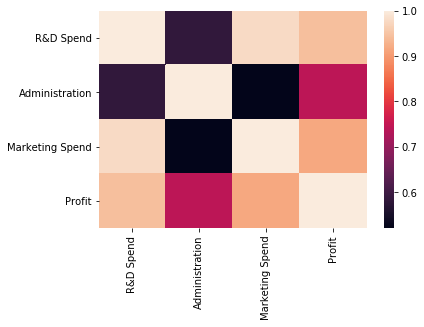

In [4]:
sns.heatmap(comp_profit.corr())

### Encoding the categorical data

We cannot feed String type variables into our Machine Learning model as it can only work with numbers.
To overcome this problem we use the Label Encoder object and create Dummy Variables using the OneHotEncoder object

In [5]:
#Encoding the Categorical Data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('State',OneHotEncoder(),[3])], remainder='passthrough')
X=ct.fit_transform(X)

In [6]:
print(X[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [7]:
#avoiding dummy variables
X=X[:,1:]

### Spliting dataset into Training and Testing Datasets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(700, 5)
(300, 5)


# Here we want to predict the value of a variable based on the value of another variables. The dependent variable here is PROFIT, so best we can use is LINEAR REGRESSION MODEL

### Fitting linear regression model to the training dataset

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the test dataset

In [10]:
y_predict = lin_reg.predict(X_test)
print(y_predict)

[ 89394.23575033  88027.95819516  94508.53314457 175549.39580413
  83150.97998076 110365.61149629 131468.83716139  91080.37178898
 164499.09125685  52845.80977358  66508.0126967  150384.61048744
 126593.26898994  58880.41811175 177293.42838504  75039.29849959
 118001.51199867 164327.97934563 174978.3486738  182006.18783199
 124009.89479311  85265.30904177 180871.77326233  83737.38254065
 104639.96676191 100860.1328575   55972.52100479  56567.46734374
  68458.1180678  211528.90031712 120537.16479697 111372.47323668
 101263.40023154 137751.91749039  63521.80637149 108499.76514776
 185959.70818606 171302.67161102 174510.71530107 117423.7029346
  96497.33588966 165207.59035385 107363.92335611  49811.45273479
 116263.78584195  58173.63390514 158250.37929295  78215.23575464
 159564.20687058 130917.09063892 184767.68475627 174475.46214048
  93357.21436254  78070.21614566 180680.32254513  84147.23613674
 142703.70618688 170532.55216599  84106.25650591 105090.52500577
 141460.38501846  52204.66

### To see the difference b/w predicted and actual results we will also print the test values

In [11]:
print(y_test)

[ 89012.02672  87654.55773  94093.35179 175396.2616   83356.61784
 110395.794   105008.31     90687.2921  164180.2702   53483.75718
  66273.3533  150393.716   125971.2343   58694.93455 176344.525
  75297.23305 118219.3944  163462.6654  132602.65    181574.4968
  97483.56     84909.71956 180684.3252   83391.64379 104159.467
 100404.0021   64926.08     56944.49153  68210.88613 191792.06
 120738.6997  110848.5685  101352.2656  137842.4672   63306.39937
 107994.381   185502.5285  171176.9165  174364.2776  117645.3106
  96616.9285  164336.6055  106865.8621   50468.96294 116492.8715
  57992.70704 158208.7735   78689.62408 159514.1307  131051.7051
 184555.1194  174329.2516   92949.45565  78308.61013 180257.1795
  84583.38025 142762.3312  170174.8327   84305.73556 105154.7165
 141527.0259   52609.81711 140832.487   138872.7426   97478.0542
 113578.8837  126506.0207  151774.2509   58918.75889 174007.1838
 123690.2763  167934.0264   91370.72519 155791.1289   83553.10486
  77847.29279 120375.6258

### Calculating Coefficient

In [12]:
print(lin_reg.coef_)

[-7.89616003e+02 -5.51149301e+02  5.26047095e-01  9.78530820e-01
  9.80946128e-02]


### Intercepts

In [13]:
print(lin_reg.intercept_)

-65676.83905540724


### Calculating R-Squared to measure of how close the data are to the fitted regression line

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict) * 100

93.1112023626832

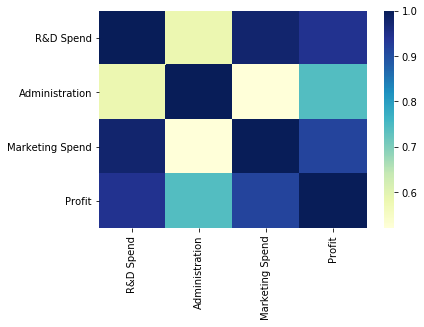

In [17]:
sns.heatmap(comp_profit.corr(), cmap="YlGnBu")

# We have successfully trained our model with certain predictors and
# estimated the profit of companies using linear regression modelling
# With 20% Test Data - 91.12%
# With 25% Test Data - 92.095
# With 30% Test Data - 93.11%
# With 35% Test Data - 92.91%
# With 50% Test Data - 92.61%
# With 90% Test Data - 89.24%
# The Best Outcome is with 30% Test Data, which is 93.11%

In [18]:
pd.get_dummies(comp_profit)

,R&D Spend,Administration,Marketing Spend,Profit,City_Bangalore,City_Delhi,City_Mumbai
0,165349.20,136897.800,471784.1000,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,166187.94000,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,333962.19000,1,0,0


# Project 2 - WINE DATASET CLASSIFICATION

In [6]:
#importing libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [5]:
from sklearn.datasets import load_wine
wine_data = datasets.load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# Since this is a dictionary, let's also print out the other key/value pairs so we can decide how we'll format a data structure useful for our needs. The dict.items() method allows easy access to the key/values in a for loop.


In [7]:
for key,value in wine_data.items():
    print(key,'\n',value,'\n')

data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three c

In [8]:
print('data.shape\t',wine_data['data'].shape,
      '\ntarget.shape \t',wine_data['target'].shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


We have 178 samples (rows) and 13 features (columns). We need to build a pandas DataFrame to hold our data so that we can make use of all of its features for our model.

In [9]:
features = pd.DataFrame(data=wine_data['data'],columns=wine_data['feature_names'])
data = features
data['target']=wine_data['target']
data['class']=data['target'].map(lambda ind: wine_data['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [10]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Below Graph shows distrbution of alcohol content among all of the wines

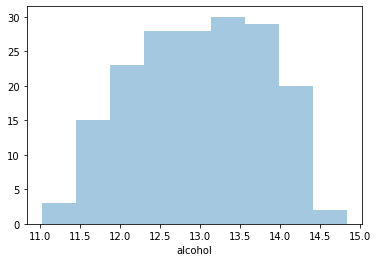

In [11]:
sns.distplot(data['alcohol'],kde=0)

# Distribution of alcohol content by class
### The three classes seem to naturally separate as low/mid/high alcohol distributions

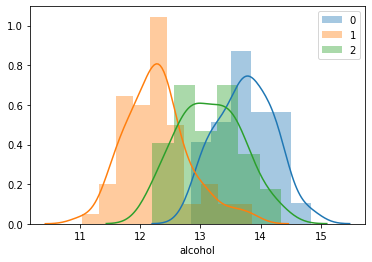

In [12]:
for i in data.target.unique():
    sns.distplot(data['alcohol'][data.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

# Splitting the data in to Train & Test Datasets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(wine_data['data'],wine_data['target'],test_size=0.3)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

124  samples in training data
 54  samples in test data



# Gaussian NB

In [14]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


# Multinomial NB

In [16]:
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
#Predict the response for test dataset using Multinomial Classifier
y_pred = MNBclf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


### Accuracy with Gaussian NB Model is 98%
### Accuracy with Multinomial NB Model is 90%
### Gaussian NB Model seems to be better for the given Dataset
### Test data considered here is 30%

# PROJECT 3 - KYPHOSIS DATASET MODELLING

In [19]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
kyphosis_data = pd.read_csv("kyphosis.csv")
kyphosis_data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [21]:
kyphosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Data has no anomalies as all the data are present!

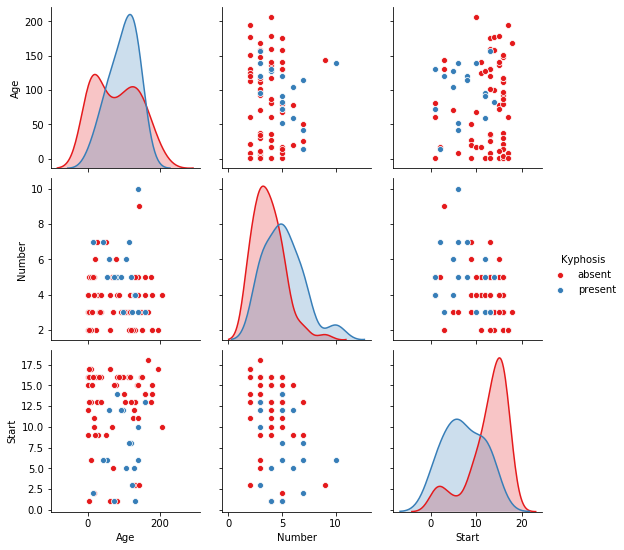

In [22]:
sns.pairplot(kyphosis_data,hue='Kyphosis',palette='Set1')

### Data pre-processing: Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split
X = kyphosis_data.drop('Kyphosis',axis=1) # features
y = kyphosis_data['Kyphosis'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## 1. Decision Tree
### Training a decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dctree = DecisionTreeClassifier()
dctree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation:

In [25]:
predictions = dctree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        21
     present       0.50      0.50      0.50         4

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



In [27]:
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 2  2]]


### Observation: Every time there is a different result for Prediction using the Decesion Tree Algorithm
### We can improve the results by using Random Forest classifier.
# 2. Random Forest
### Training a random forest now:

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rfc_pred = rfc.predict(X_test)

## Prediction and Evaluation:

In [30]:
print(confusion_matrix(y_test,rfc_pred))

[[20  1]
 [ 3  1]]


In [31]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



# 3. Conclusion
### The performance is comparable in this case (on a smaller dataset), with an overall advantage to the Random Forest, however decision trees have higher variance in general and feature importance matters.
### Random Forest works better for larger datasets (this is a small one- only 81 records, so the decision tree had an easier time to pick the best Information Gain from the first split).

# PROJECT 4 - IRIS DATASET MODELLING

In [32]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
X = iris.data[:, 2:4]
X = pd.DataFrame(X)

In [35]:
X.columns = ['petal_length', 'petal_width']

In [36]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Data Visualization

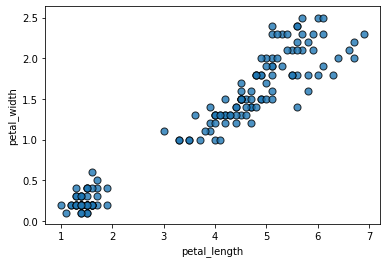

In [47]:
from matplotlib import pyplot as plt
plt.scatter(X.petal_length, X.petal_width, s=50, edgecolors="k", alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

## K Means Clustering Implementation

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
pred = kmeans.predict(X)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [82]:
X['pred'] = pred 
X.head()

,petal_length,petal_width,pred
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


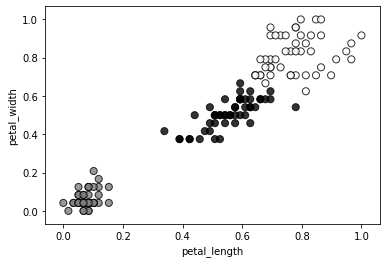

In [77]:
plt.scatter(X.petal_length, X.petal_width, s=50, c=X.pred, edgecolors='k', alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

## Elbow plot for optimum K

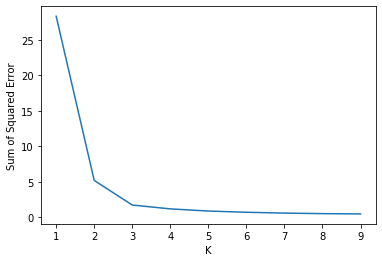

In [71]:
K_values = list(range(1,10))
sse = []
for K in K_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(K_values, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()

## For K= 2

In [55]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
y_clf_pred = clf.predict(X)
y_clf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
X['pred_new'] = y_clf_pred 
X.head()

,petal_length,petal_width,pred,pred_new
0,0.067797,0.041667,2,0
1,0.067797,0.041667,2,0
2,0.050847,0.041667,2,0
3,0.084746,0.041667,2,0
4,0.067797,0.041667,2,0


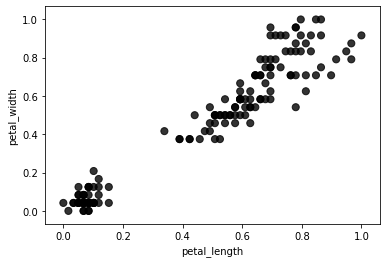

In [86]:
plt.scatter(X.petal_length, X.petal_width, s=50, c=X.pred_new, edgecolors='k', alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

## Preprocessing using min max scaler

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X[['petal_length']])
X['petal_length'] = scaler.transform(X[['petal_length']])

scaler.fit(X[['petal_width']])
X['petal_width'] = scaler.transform(X[['petal_width']])

In [60]:
X.head()

,petal_length,petal_width,pred,pred_new
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0


In [61]:
X.drop(columns=['pred', 'pred_new'], inplace=True)

In [62]:
X.head()

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [63]:
kmeansclf = KMeans(n_clusters=3)

In [64]:
pred = kmeansclf.fit_predict(X)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
len(pred)

150

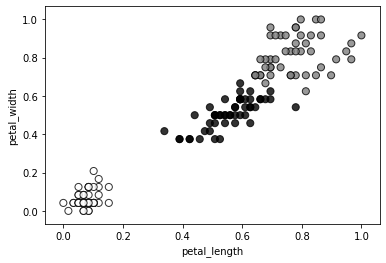

In [87]:
plt.scatter(X.petal_length, X.petal_width, s=50, c=pred, edgecolors='k', alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

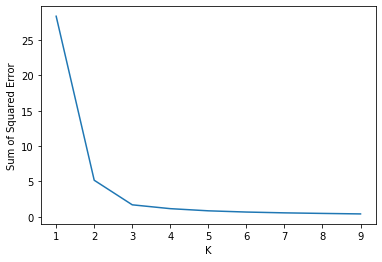

In [67]:
K_values_new = list(range(1,10))
sse_new = []
for K_new in K_values_new:
    kmeans_new = KMeans(n_clusters=K_new)
    kmeans_new.fit(X)
    sse_new.append(kmeans_new.inertia_)
plt.plot(K_values_new, sse_new)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()

### With Min Max Scaler and K=2 the Model is prepared using K Means Clustering for IRIS Dataset for further optimization

# EXERCISE 1 - DIABETES DATASET USING K NEAREST NEIGHBOR

# Q.1 What is K Nearest Neighbor (KNN) Algorithm for Machine Learning

## Ans: K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

# Q. 2 How does K-NN work?

## KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression)

# Q.3 Implementation of the KNN algorithm-Take dataset:diabetes.csv

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [89]:
# Read in datasets
df = pd.read_csv('Diabetes.csv')

In [90]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
# Replace Null ('0') values except Pregnancies
df.Glucose.replace(0, np.nan, inplace=True)
df.BloodPressure.replace(0, np.nan, inplace=True)
df.SkinThickness.replace(0, np.nan, inplace=True)
df.Insulin.replace(0, np.nan, inplace=True)
df.BMI.replace(0, np.nan, inplace=True)
df.DiabetesPedigreeFunction.replace(0, np.nan, inplace=True)
df.Age.replace(0, np.nan, inplace=True)

In [93]:
# Keep only values with insulin records
all_insulin = df[np.isfinite(df['Insulin'])]

In [94]:
# Drop any remainig na values
patients = df.dropna()

In [95]:
patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [96]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [97]:
patients.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
# Create arrays for the features and the response variable
x = patients.drop(['Outcome'], axis=1).values
y = patients['Outcome'].values
print(x,y)

[[  1.     89.     66.    ...  28.1     0.167  21.   ]
 [  0.    137.     40.    ...  43.1     2.288  33.   ]
 [  3.     78.     50.    ...  31.      0.248  26.   ]
 ...
 [  2.     88.     58.    ...  28.4     0.766  22.   ]
 [ 10.    101.     76.    ...  32.9     0.171  63.   ]
 [  5.    121.     72.    ...  26.2     0.245  30.   ]] [0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0

In [99]:
# Split the data into test and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42, stratify=y)

In [100]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [101]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

In [102]:
# Print the accuracy
print("ACCURACY: ")
print(" ")
print(knn.score(x_test, y_test))

ACCURACY: 
 
0.7966101694915254


In [103]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(x_test)

In [104]:
# Generate the confusion matrix and classification report
print("CONFUSION MATRIX: ") 
print(" ")
print(confusion_matrix(y_test, y_pred))
print(" ")
print("CLASSIFICATION REPORT: ")
print(" ")
print(classification_report(y_test, y_pred))

CONFUSION MATRIX: 
 
[[71  8]
 [16 23]]
 
CLASSIFICATION REPORT: 
 
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        79
           1       0.74      0.59      0.66        39

    accuracy                           0.80       118
   macro avg       0.78      0.74      0.76       118
weighted avg       0.79      0.80      0.79       118



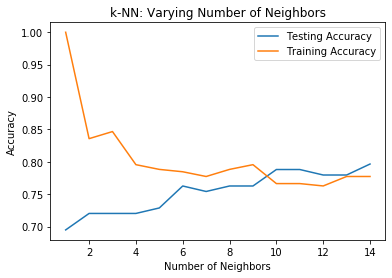

In [105]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()